## CONTROLE DE COMISSIONAMENTO - PET STOP

### 1 - Importação do dataframe; seleção de colunas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


colunas = ['Data e hora', 'Venda', 'Status da venda', 'Funcionário', 'Tipo do Item', 'Grupo', 'Produto/serviço', 'Quantidade', 'Líquido']
df = pd.read_csv("/home/pedro/Desktop/comissao/vendas_modificado.csv", sep=';', usecols= colunas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13803 entries, 0 to 13802
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data e hora      13803 non-null  object
 1   Venda            13803 non-null  int64 
 2   Status da venda  13803 non-null  object
 3   Funcionário      13803 non-null  object
 4   Tipo do Item     13410 non-null  object
 5   Grupo            13803 non-null  object
 6   Produto/serviço  13803 non-null  object
 7   Quantidade       13803 non-null  object
 8   Líquido          13803 non-null  object
dtypes: int64(1), object(8)
memory usage: 970.7+ KB


### 2 - Filtrar vendas não baixadas e grupos que não interessam

##### Apenas vendas baixadas

In [2]:
df = df[df['Status da venda'] == 'Baixado']
df.shape[0]

13679

##### Filtrando por 'produto'; filtrando 'grupo' pelos que são passíveis de comissionamento

In [3]:
df = df[df['Tipo do Item'] == 'Produto']

In [4]:
grupos_desejados = ['Farmácia', 'Biscoitos e Petiscos', 'Antiparasitários', 'Acessórios', 'Roupa', 'Ração úmida']
df = df[df['Grupo'].isin(grupos_desejados)]

##### Coluna 'Líquido' para float; soma total agrupando por funcionário

In [5]:
df['Líquido'] = df['Líquido'].str.replace(',','.')

In [6]:
df['Líquido'] = df['Líquido'].apply(lambda x: float(x))

In [7]:
df['Funcionário'] = df['Funcionário'].str.lower()

venda_funcionario = df.groupby('Funcionário')['Líquido'].sum().sort_values(ascending=False).rename('lucro').reset_index()
venda_funcionario

,Funcionário,lucro
0,canopus,28998.21
1,lyra,27061.88
2,betelgeuse,21707.77
3,antares,13319.57
4,castor,7299.71
5,deneb,6856.00
6,cassiopeia,6736.66
7,sirius,4820.43
8,spica,3400.42
9,ursa major,2527.35


### 3 - Produtos mais vendidos ($)

In [8]:
df['Produto/serviço'] = df['Produto/serviço'].str.lower()

In [9]:
lucro_produto = df.groupby('Produto/serviço')['Líquido'].sum().sort_values(ascending=False).head(20).rename('lucro').reset_index()
lucro_produto

,Produto/serviço,lucro
0,benevita bem estar suplemento idoso oncológico...,11226.25
1,benevita moove 30 tabs,10670.00
2,milbemax 5-25 kg caixa c 2cp,5585.30
3,lactofull probiótico pasta 14g,4534.50
4,"bravecto 250 mg 4,5 a 10 kg",4335.75
5,bravecto 500 mg - 10 a 20 kg,3095.00
6,benevita simbiotico (pré e probiotico) 20 tabs,3073.60
7,"bravecto transdermal cães 250mg 4,5kg - 10kg",3066.50
8,benevita hepático 30 tabs,3004.25
9,vetaglós 50g - pomada,2638.08


### 4 - Produtos mais vendidos (quantidade)

In [10]:
df['Quantidade'] = df['Quantidade'].str.replace(',', '.')

In [11]:
df['Quantidade'] = df['Quantidade'].astype(float).astype(int)
df.groupby('Produto/serviço')['Quantidade'].sum().sort_values(ascending=False).head(20)


Produto/serviço
flamavet gatos 0.2 mg/comp (meloxicam) ain                126
gaviz v 10mg / comp                                       116
meloxiworld 0,5 mg / comp (meloxicam aine)                101
milbemax  5-25 kg caixa c 2cp                              96
lactofull probiótico pasta 14g                             85
meloxiworld 2mg / comp (meloxicam aine)                    78
benevita bem estar suplemento idoso oncológico 60 tabs     65
flamavet caes 2.0 mg/ comp (meloxicam)                     59
milbemax até 5 kg caixa c 2cp                              54
benevita moove 30 tabs                                     54
stick toy story spin pet sabores 25g                       49
cronidor 12mg por comp                                     48
benevita simbiotico (pré e probiotico) 20 tabs             48
vetaglós 50g - pomada                                      46
sulfaprim por comprimido (atb)                             44
milbemax gato - ( de 2 a 8 kg ) caixa                 

##### Como a maioria dos produtos no topo da lista são produtos vendidos por comprimido, vou filtrá-los

In [12]:
df_sem_comp = df[~df['Produto/serviço'].str.contains('comp', case=False, na=False)]
qtd_produto = df_sem_comp.groupby('Produto/serviço')['Quantidade'].sum().sort_values(ascending=False).head(20).rename('quantidade').reset_index()
qtd_produto

,Produto/serviço,quantidade
0,milbemax 5-25 kg caixa c 2cp,96
1,lactofull probiótico pasta 14g,85
2,benevita bem estar suplemento idoso oncológico...,65
3,milbemax até 5 kg caixa c 2cp,54
4,benevita moove 30 tabs,54
5,stick toy story spin pet sabores 25g,49
6,benevita simbiotico (pré e probiotico) 20 tabs,48
7,vetaglós 50g - pomada,46
8,milbemax gato - ( de 2 a 8 kg ) caixa,41
9,hill's can fel a/d lata 156g,37


### 5 - Convertendo data e hora para objetos datetime

In [13]:
df['data'] = df['Data e hora'].str.split(' ').str[0]

In [14]:
del df['Data e hora']

In [15]:
df.set_index('data')
df['data'] = pd.to_datetime(df['data'], format="%d/%m/%Y")


### 6- Vendas por funcionário por mês

In [16]:
df['mes'] = pd.to_datetime(df['data']).dt.month
df.groupby(['Funcionário', 'mes'])['Líquido'].sum().rename('faturamento').unstack()


mes,1,2,3,4,5,6,7,8,9,10,11,12
Funcionário,,,,,,,,,,,,
altair,NaN,NaN,276.50,NaN,139.00,459.05,169.90,355.90,130.52,57.60,123.60,38.95
andromeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.90,NaN
antares,1929.45,3154.85,2000.54,2371.60,2223.10,1027.73,135.00,NaN,NaN,NaN,378.50,98.80
betelgeuse,2378.05,1820.34,1117.60,1779.90,1839.35,1533.47,2897.93,1906.90,2073.08,1072.75,2919.60,368.80
canopus,3895.78,3273.32,1855.60,3356.65,3601.60,1294.58,3040.29,1637.77,2076.27,1543.40,372.00,3050.95
cassiopeia,NaN,1105.12,1276.30,807.44,1691.35,829.54,332.98,410.73,283.20,NaN,NaN,NaN
castor,217.60,299.90,188.00,133.00,1183.37,365.72,1106.05,438.00,639.20,336.10,1395.37,997.40
deneb,2837.20,500.50,1273.50,1376.80,733.00,135.00,NaN,NaN,NaN,NaN,NaN,NaN
hydra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50,342.00,NaN,NaN


### 7 - Vendas totais por mês

In [17]:
total_mes = df.groupby('mes')['Líquido'].sum().rename('faturamento')
total_mes

mes
1     13408.38
2     13052.33
3     11027.04
4     12219.44
5     14379.62
6      7606.88
7     11098.94
8      8147.35
9      9151.23
10     7635.45
11    10969.09
12     8426.92
Name: faturamento, dtype: float64

### 8 - Vendas líquidas médias por mês

In [18]:
lucro_medio = np.round(df.groupby('mes')['Líquido'].sum().mean(), 2)
print("O lucro médio mensal com os produtos selecionados é: $", lucro_medio)

O lucro médio mensal com os produtos selecionados é: $ 10593.56


###  9 -Estatística descritiva

In [19]:
# Líquido por observação
df['Líquido'].describe()

count    1521.000000
mean       83.578350
std        71.901474
min         0.000000
25%        37.000000
50%        57.000000
75%       119.700000
max       532.000000
Name: Líquido, dtype: float64

In [20]:
# Líquido por mês
df.groupby('mes')['Líquido'].describe()

,count,mean,std,min,25%,50%,75%,max
mes,,,,,,,,
1,156.0,85.951154,68.499090,3.20,32.375,57.60,141.500,380.0
2,170.0,76.778412,63.791000,2.50,34.000,56.00,114.000,275.0
3,129.0,85.480930,72.492782,0.00,34.000,57.00,131.000,316.0
4,161.0,75.897143,66.115298,3.00,36.000,54.15,93.100,316.0
5,158.0,91.010253,72.886111,2.88,37.400,57.30,134.975,380.0
6,113.0,67.317522,57.957218,2.95,32.000,45.00,90.000,241.9
7,123.0,90.235285,80.825362,2.50,41.900,57.00,135.000,400.0
8,98.0,83.136224,73.727431,2.50,37.000,57.60,135.000,380.0
9,108.0,84.733611,79.027490,4.20,30.750,55.00,136.750,350.0


## 10 - Gráficos

In [21]:
%matplotlib inline

#### Faturamento líquido total por mês

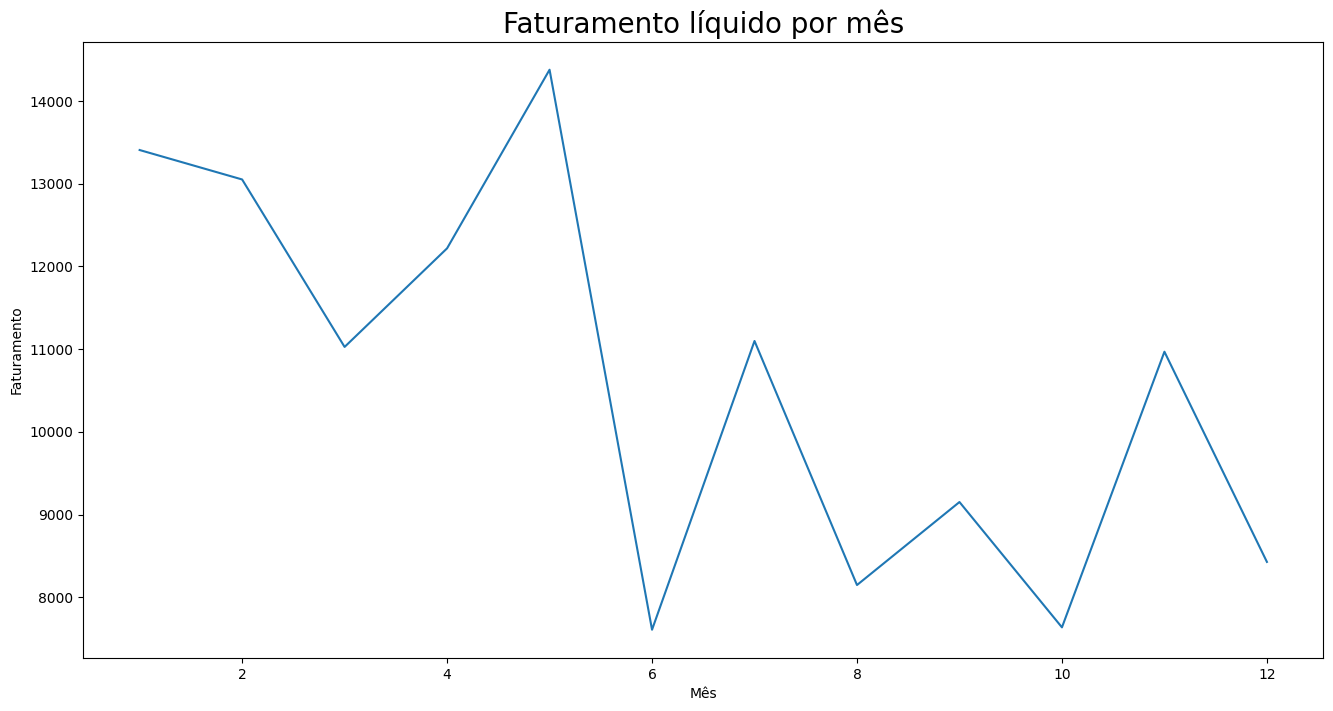

In [26]:
plt.figure(figsize=(16,8))
plt.title('Faturamento líquido por mês', size=20)
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.plot(total_mes)

#### Lucro por produto

<Axes: ylabel='Produto/serviço'>

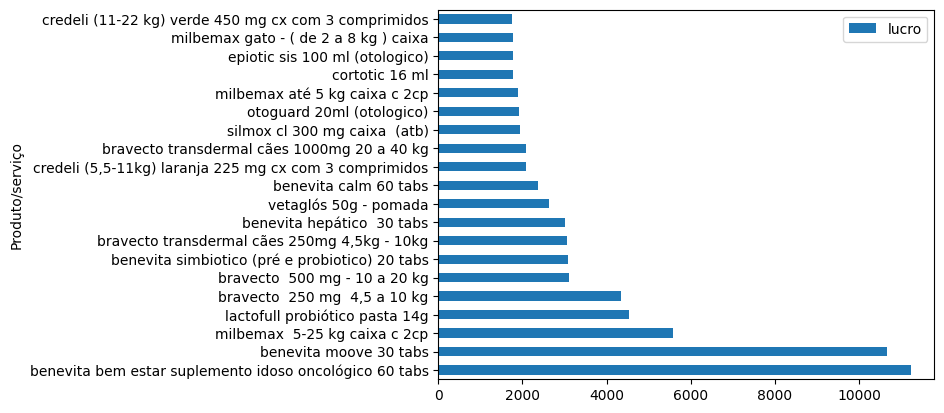

In [23]:
lucro_produto.plot.barh(x='Produto/serviço', y='lucro')

<Axes: ylabel='Produto/serviço'>

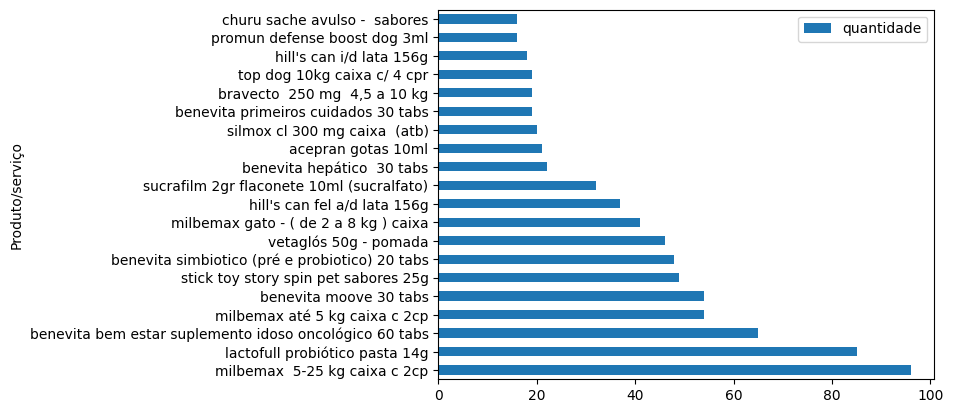

In [24]:
qtd_produto.plot.barh(x='Produto/serviço', y='quantidade')

#### Lucro por funcionário

<Axes: ylabel='Funcionário'>

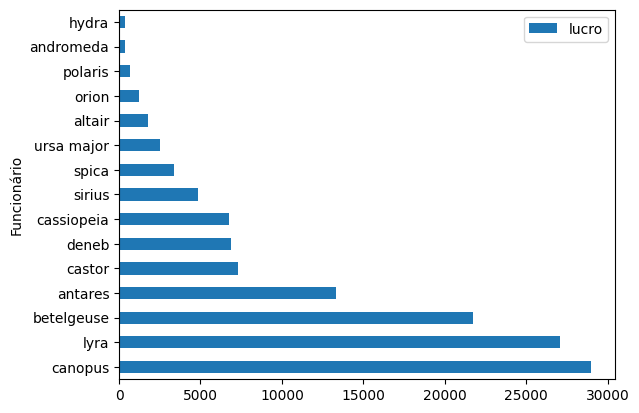

In [25]:
venda_funcionario.plot.barh(x='Funcionário', y='lucro')